## Deadline + Late Penalty

$\textbf{Note:}$ It will take you quite some time to complete this project, therefore, we earnestly recommend that you start working as early as possible. You should read the specs carefully at least 2-3 times before you start coding.

* $\textbf{Submission deadline for the Project (Part-2) is 20:59:59 (08:59:59 PM) on 18th Nov, 2019}$
* $\textbf{LATE PENALTY: 10% on day-1 and 20% on each subsequent day.}$

## Instructions
1. This note book contains instructions for $\textbf{COMP6714-Project (Part-2)}$. We have already released the instructions for the $\textbf{Part-1 of the Project}$ in a seperate notebook. 

* You are required to complete your implementation for part-2 in the file `project_part2.py` provided along with this notebook. Please $\textbf{DO NOT ALTER}$ the name of the file.

* You are not allowed to print out unnecessary stuff. We will not consider any output printed out on the screen. All results should be returned in appropriate data structures via corresponding functions.

* You can submit your implementation for **Project (Part-2)** via submission system: http://kg.cse.unsw.edu.au/submit/ . We have already sent out the invitations for you to join the submission system. In case of problems please post your request @ Piazza.

* For each question, we have provided you with detailed instructions along with question headings. In case of problems, you can post your query @ Piazza.

* You are allowed to add other functions and/or import modules (you may have to for this project), but you are not allowed to define global variables. **Only functions are allowed** in `project_part2.py`

* You should not import unnecessary and non-standard modules/libraries. Loading such libraries at test time will lead to errors and hence ZERO score for your project. If you are not sure, please ask @ Piazza. 

* We will provide immediate feedback on your submission. You can access your scores using the online submission portal on the same day. 

* For the **Final Evaluation**, we will be using different data sets, so your final scores may vary.  

* You are allowed to have a limited number of Feedback Attempts $\textbf{(15 Attempts for each student)}$, we will use your **LAST** submission for Final Evaluation.

### Allowed Libraries:

You are required to write your implementation for the project (part-2) using `Python 3.6.5`. You are only allowed to use the following python libraries:
* $\textbf{spacy (v2.1.8)}$
* $\textbf{XGBoost (v0.90)}$

# Q2: Named Entity Disambiguation/Named Entity Linking (20 Points)

For $Q2$, you are required to use your experience gained in $Q1$ (from project-part1) to solve a renowned problem in language processing, i.e., Named Entity Disambiguation (NED) aka Named Entity Linking (NEL). It aims at assigning unique identities (i.e., entities, such as Persons, Locations and Organizations etc.) to the mention (i.e., a substring/span of the sentence that refer to an **entity**) identified in the text.

For example, consider the sentence: `Olympia is the captial of Washington`. The **mention** `Washington` refers to the **entity** `Washington (state)` (https://en.wikipedia.org/wiki/Washington_(state)), rather than other possible entities with similar names, such as: (i) `The Washington Post (an American daily newspaper)` (https://en.wikipedia.org/wiki/The_Washington_Post), (ii) `The George Washington (former U.S. president)` (https://en.wikipedia.org/wiki/George_Washington), etc.



For this project, we provide you with the text documents with the mentions pre-idetified alongwith a list of possible candidate entities corresponding to each mention. Your task is to come up with a learning to rank model in order to disambiguate the mention, i.e., map the mention to the correct entity.


### Inputs:
Input to your model are as follows. The file formats are explained in the next sub-section.

1. $men\_docs.pickle$ <br>
   A python dictionary of the documents with mentions pre-identified.
2. $parsed\_candidate\_entities.pickle$ <br>
   A dictionary containing textual description for each candidate entity (pages from Wikipedia). **Note** that we have already pre-processed and parsed the candidate entity pages for you.
3. $train.pickle$ <br>
   Training data.
4. $train\_labels.pickle$ <br> 
   Labels corresponding to the training data.
5. $dev.pickle$ <br>
   Development data. **Note:** we will use this $dev$ data to provide Feedback for $Q2$. For final evaluation, we will be using completely different $test$ data sets.
6. $dev\_labels.pickle$ <br>
   Labels corresponding to the `dev` data.

## File Formats 

### 1. $men\_docs.pickle$
It is a python dictionary containing the documents pertaining to the mention with $key:$ document title, $value:$ document text. Each document conatins free text.

### 2. $parsed\_candidate\_entities.pickle$

It is a python dictionary storing the Wikipedia description pages for each candidate entity with: 
* $key:$ entity name, 
* $value:$ text corresponding to entity's description. We use entity's wikipedia page to capture the entity's description. Parsing large text files may take a considerable time, so we provide you with the $spacy's$ parsing results. We consider each document as a large paragraph and store the parsing results as a list of tuples, with each tuple of the form:

> $(id, token, lemma, pos\text{-}tag, entity\text{-}tag)$, where <br>
 * $id$: corresponds to a unique token id in the paragpah <br>
 * $token$: corresponds to the original text token <br>
 * $lemma$: corresponds to the token's lemma <br>
 * $pos\text{-}tag$: is the token's part-of-the-speech tag <br>
 * $entity\text{-}tag$: is the entity tag detected by the spacy.<br>
 
For detailed descrition of the spacy's paring results, please check the following link: https://spacy.io/usage/linguistic-features

A small subset of the parsed text for the entity `Cartoon_Network_Nordic` from the file $parsed\_candidate\_entities.pickle$ is as under:

### 3. $train.pickle$
A python dictionary containing the training data. It consists of following fields: <br>
* $key:$ A unique integer containing the mention_id, 
* $value:$ A dictionary containing the mention's description as following $key\text{-}value$ pairs:
> * $doc\_title:$ Title of the document containing the mention. It will be one of the keys of the dictionary: $men\_docs.pickle$ <br>
  * $mention:$ Token span within the document $doc\_title$ indicating the mention.<br>
  * $offset:$ Mention's offset position in the document $doc\_title$<br>
  * $length:$ Length of the mention's tokens<br>
  * $candidate\_entities:$ A list of candidate entities corresponding to the mention. Each entity candidate corresponds to a key in the file: $parsed\_candidate\_entities.pickle$ <br>

An example mention from the file $train.pikcle$ is shown below:

### 4. $train\_labels.pickle$
A python dictionary containing the labels corresponding to the training mentions. It consists of following fields: <br>
* $key:$ A unique integer containing the mention_id, $value:$ A dictionary containing the following key-value pairs:
> 1. $doc\_title:$ Title of the document containing the mention. It will be one of the keys of the dictionary: $men\_docs.pickle$ <br>
  * $mention:$ Tokens span within the document $doc\_title$ indicating the mention.<br>
  * $label:$ Mention's Ground Truth Entity Label. It also corresponds to a key in the file: $parsed\_candidate\_entities.pickle$ <br>
  
**Note:**, for each mention, we use the same `mention_id` for both the files: (i) $train.pickle$, and (ii) $train\_labels.pickle$.<br>

An example from the file $train\_labels.pikcle$ is shown as follows:

### 5. $dev.pickle$
It follows the same format as that of the file: $train.pickle$
### 6. $dev\_labels.pickle$
It follows the same format as the of the file: $train\_labels.pickle$

$\textbf{Note:}$ The `dev` data set is meant to provide the **Project Feedback** and facilitate your implementation. For final evaluation, we will be using a totally different `test` data set.

$\textbf{TASK:}$ 

Given a document $men\_doc = [w_1, w_2,...,w_Q]$; mention span within the document = $\{m_i\}$; and a collection of candidate entities for each mention alongwith corresponding entity description pages: $\{e_i\}_{i=1}^{n}$. You are required to use the:<br> 

1. Mention
* Mention's document (i.e., men_doc)
* Entity description page for each candidate entity.

to come up with a learning-to-rank model to rank the candidate entities corresponding to each mention in such a way that the Ground Truth Entity is ranked higher than the false candidates. **You are only allowed to:**

* Use the $XGBoost$ classifier to build your learning-to-rank model.


$\textbf{HINTS:}$
1. As a baseline model, you can use your experience gained in the Project (Part-1) to compute the TF-IDF statistics for words appearing in the mention and/or entity description pages. You can consider different ways to generate useful features for your learning-to-rank model. Your model should be able to achieve more than `70-%` accuracy for the `dev` set using basic TF-IDF features.

* Later, you may think of advanced feaures to further enhance the performance of your model.
* In order to train your XGBoost ranking classifier, you can start with the following parameters, and keep on improving them later:
> * objective: `rank:pairwise`
  * max_depth: `7-9`
  * n_estimators: `4500-5500` <br>
  * eta: `0.01-0.09`
  * lambda: `~100`
  * min_child_weight: `0.01-0.02`

For XGBoost parameter description, see the following URL: https://xgboost.readthedocs.io/en/latest/parameter.html

### NOTE
1. $\textbf{YOU SHOULD NOT HARD CODE}$ the Ground Truth in your implementation. Violations in this regard will get $\textbf{ZERO SCORE}$ for the $\textbf{Project (Part-1 + Part-2)}$.<br>

* For final evaluation of $Q2$, we will be using different set of `test` data sets (with different numbers of testing mentions), which will follow the same format as that of the `dev` data.<br>

* You model should not overfit the provided `dev` data set. Overfitting may lead to a worse performance for the `test` data sets and you may get a LOW SCORE.

* For ranking entity candidates for each mention, you are $\textbf{NOT ALLOWED}$ to use Additional Information and/or External Resources other than the provided in the files corresponding to $Q2$.<br>

* You are $\textbf{NOT ALLOWED}$ to use deep learning and/or pre-trained embedding models.

* In order to come up with a learning-to-rank model, you are only allowed to use $XGBoost$ classifier (v0.90). You may check-out the documentation of the $XGBoost$ classifier via following url: https://xgboost.readthedocs.io/en/latest/python/python_api.html

### Output Format (Q2):

Your output should be a `dict()` of the form:<br>

`{mid:'Entity_Label'}`, where <br>
* `mid` corresponds to the mention id in the `dev` and/or `test` data set.
* `Entity_Label` corresponds to the mention's most relevant entity label amongst the candidate labels.

### Running Time:
* On CSE machine, your implementation should return the result within 10 minutes (600-sec) **(USER + SYSTEM)**.

## How we test your implementation

In [1]:
## Import Necessary Modules...
import pickle
import project_part2_test as project_part2

In [2]:
## Read the data sets...

### Read the Training Data
train_file = './Data/train.pickle'
train_mentions = pickle.load(open(train_file, 'rb'))
i = 0
for key in train_mentions.keys():
    if i < 5:
        print(f'{key}: {train_mentions[key]}')
        i = i+1

### Read the Training Labels...
train_label_file = './Data/train_labels.pickle'
train_labels = pickle.load(open(train_label_file, 'rb'))
print(len(train_labels))
i = 0
for key in train_labels.keys():
   if i < 5:
       print(f'{key}: {train_labels[key]}')
       i = i+1

### Read the Dev Data... (For Final Evaluation, we will replace it with the Test Data)
dev_file = './Data/dev.pickle'
dev_mentions = pickle.load(open(dev_file, 'rb'))
print()
#print(dev_mentions)

### Read the Parsed Entity Candidate Pages...
fname = './Data/parsed_candidate_entities.pickle'
parsed_entity_pages = pickle.load(open(fname, 'rb'))  
#print(len(parsed_entity_pages))
#print(parsed_entity_pages['PGA_Tour'])
'''i = 0
for key in parsed_entity_pages.keys():
    if i < 1:
        print(f'{key}: {parsed_entity_pages[key]}')
        i = i+1'''

### Read the Mention docs...
mens_docs_file = "./Data/men_docs.pickle"
men_docs = pickle.load(open(mens_docs_file, 'rb'))
print()
#print(men_docs['1_GOLF'])
#print(men_docs['1_GOLF'][2046:2080])
#print(men_docs)

1: {'doc_title': '1_GOLF', 'mention': 'PGA Tour', 'offset': 2046, 'length': 8, 'candidate_entities': ['Professional_Golfers_Association', 'PGA_Tour', 'Golf_Channel_on_NBC', '2009_PGA_Tour', '2011_PGA_Tour', '2008_PGA_Tour', 'PGA_Tour_on_CBS']}
2: {'doc_title': '1_GOLF', 'mention': 'World Series of Golf', 'offset': 2097, 'length': 20, 'candidate_entities': ['World_Series_of_Golf', 'WGC-Bridgestone_Invitational']}
3: {'doc_title': '2_ATHLETICS', 'mention': 'Cuba', 'offset': 262, 'length': 4, 'candidate_entities': ['Cuba_Merced_County_California', 'History_of_Cuba', 'Cuba_North_Dakota', 'Cuba', 'Cuba_Indiana', 'Cuba_at_the_2011_World_Aquatics_Championships', 'Football_Association_of_Cuba', 'ChinaCuba_relations']}
4: {'doc_title': '2_ATHLETICS', 'mention': 'Slovenia', 'offset': 297, 'length': 8, 'candidate_entities': ['Slovenia', 'Economy_of_Slovenia', 'Slovenia_at_the_Paralympics', 'Slovenian_Parliament', 'Slovenia_at_the_2009_Mediterranean_Games', 'Slovenia_mens_national_ice_hockey_team'

construct index time:  18.13489031791687
train raw data finished, 0.0488741397857666
length of f is:  6
train feature finished, 107.56610012054443
train transform data finished, 0.007981300354003906
test raw data finished, 0.023933887481689453
length of f is:  6
test feature finished, 31.87211012840271
test transform data finished, 0.0039882659912109375*********************
train model finished, 60.284629344940186


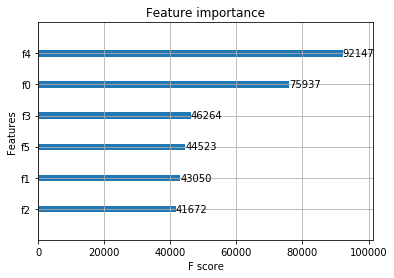

predict finished
total time:  225.25378608703613


In [3]:
## Result of the model...
result = project_part2.disambiguate_mentions(train_mentions, train_labels, dev_mentions, men_docs, parsed_entity_pages)

In [4]:
## Here, we print out sample result of the model for illustration...
for key in list(result)[:5]:
    print('KEY: {} \t VAL: {}'.format(key,result[key]))

KEY: 1 	 VAL: 1982_FIFA_World_Cup
KEY: 2 	 VAL: Bucharest
KEY: 3 	 VAL: Romania_national_football_team
KEY: 4 	 VAL: Lithuania_national_football_team
KEY: 5 	 VAL: 1998_FIFA_World_Cup


In [5]:
## We will be using the following function to compute the accuracy...
def compute_accuracy(result, data_labels):
    assert set(list(result.keys())) - set(list(data_labels.keys())) == set()
    TP = 0.0
    for id_ in result.keys():
        if result[id_] == data_labels[id_]['label']:
            TP +=1
    assert len(result) == len(data_labels)
    return TP/len(result)

In [6]:
### Read the Dev Labels... (For Final Evaluation, we will replace it with the Test Data)
dev_label_file = './Data/dev_labels.pickle'
dev_labels = pickle.load(open(dev_label_file, 'rb'))

accuracy = compute_accuracy(result, dev_labels)
print("Accuracy = ", accuracy)

Accuracy =  0.9190140845070423


### Evaluation Metric + Scoring Function

* We will compute the accuracy of your model on the `test` and/or `dev` data sets, as shown in the function: `compute_accuracy(result, data_labels)` given above. Later, we will be using the following piece-wise linear scoring function to compute your scores (0-20) for $Q2$.

$$
{
Score(x) =\left\{
            \begin{array}{lr}
              0\quad x<0.70\\
              10\cdot(20x-14) \quad 0.70 < x \leq 0.75 \\
              10\cdot(5x-2.75) \quad 0.75 < x < 0.85 \\
              10\cdot(12.5x-9.125) \quad 0.85 \leq x < 0.89 \\
              20\quad x \geq 0.89
            \end{array}
          \right.
}
$$


## Project Submission and Feedback

For project submission, you are required to submit the following files:

1. Your implementation in a python file `project_part2.py`.

2. A report `project_part2.pdf` You need to write a concise and simple report illustrating
    - Implementation details of $Q2$.
    - Especially, your approach for extending your implementation in ($Q1$) for ($Q2$).

**Note:** Every student will be entitled to **15 Feedback Attempts** (use them wisely), we will use the last submission for final evaluation of the **Project (part-2)**.

## Bonus Points (10 points)

We will award $\textbf{BONUS POINTS to the TOP-10}$ best performing students in the decreasing order of the performance on the **Project (Part-2)**, i.e., the best performing student will get 10 points, second-best will get 9 points and so on.

**NOTE**:

* We will not consider Project (Part-1) to award BONUS scores. 
* We will not recieve any seperate submission for the BONUS points.
* Your project implementation for the **Part-2** will be automatically considered for the Bonus scores.

In [1]:
#test set 2
## Import Necessary Modules...
import pickle
import project_part2 as project_part2

In [2]:
## Read the data sets...

### Read the Training Data
train_file2 = './Dev_set_2/train.pickle'
train_mentions2 = pickle.load(open(train_file2, 'rb'))
'''i = 0
for key in train_mentions2.keys():
    if i < 15:
        print(f'{key}: {train_mentions2[key]}')
        i = i+1'''
#print(train_mentions2[48])

### Read the Training Labels...
train_label_file2 = './Dev_set_2/train_labels.pickle'
train_labels2 = pickle.load(open(train_label_file2, 'rb'))
'''print(len(train_labels2))
i = 0
for key in train_labels2.keys():
   if i < 60:
       print(f'{key}: {train_labels2[key]}')
       i = i+1'''

### Read the Dev Data... (For Final Evaluation, we will replace it with the Test Data)
dev_file2 = './Dev_set_2/dev2.pickle'
dev_mentions2 = pickle.load(open(dev_file2, 'rb'))
print()
#print(dev_mentions)

### Read the Parsed Entity Candidate Pages...
fname = './Dev_set_2/parsed_candidate_entities.pickle'
parsed_entity_pages2 = pickle.load(open(fname, 'rb'))  
#print(len(parsed_entity_pages))
#print(parsed_entity_pages['PGA_Tour'])
'''i = 0
for key in parsed_entity_pages.keys():
    if i < 1:
        print(f'{key}: {parsed_entity_pages[key]}')
        i = i+1'''

### Read the Mention docs...
mens_docs_file2 = "./Dev_set_2/men_docs.pickle"
men_docs2 = pickle.load(open(mens_docs_file2, 'rb'))
print(men_docs2['2_ATHLETICS'][1900:])


ock ( Britain ) 3:54.67
 8. Marcus O'Sullivan ( Ireland ) 3:54.87
 Men's discus
 1. Lars Riedel ( Germany ) 70.60 metres
 2. Anthony Washington ( U.S. ) 68.44
 3. Vasily Kaptyukh ( Belarus ) 66.24
 4. Vladimir Dubrovshchik ( Belarus ) 65.30
 5. Virgilijus Alekna ( Lithuania ) 65.00
 6. Juergen Schult ( Germany ) 64.46
 7. Andreas Seelig ( Germany ) 62.00
 8. Michael Moellenbeck ( Germany ) 58.56
 Women's 100 metres
 1. Gail Devers ( U.S. ) 10.89 seconds
 2. Merlene Ottey ( Jamaica ) 10.94
 3. Gwen Torrence ( U.S. ) 11.07
 4. Mary Onyali ( Nigeria ) 11.14
 5. Chryste Gaines ( U.S. ) 11.20
 6. Chandra Sturrup ( Bahamas ) 11.26
 7. Irina Privalova ( Russia ) 11.27
 8. Inger Miller ( U.S. ) 11.37
 Women's 5,000 metres
 1. Gabriela Szabo ( Romania ) 15 minutes 04.95 seconds
 2. Gete Wami ( Ethiopia ) 15:05.21
 3. Rose Cheruiyot ( Kenya ) 15:05.41
 4. Annemari Sandell ( Finland ) 15:06.33
 5. Tegla Loroupe ( Kenya ) 15:08.79
 6. Gunhild Halle ( Norway ) 15:09.00
 7. Pauline Konga ( Kenya ) 

construct index time:  26.980397701263428
train raw data finished, 0.06256699562072754
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['PROPN', 'PROPN'] ['NUM', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['NUM', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['NUM', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['PROPN', 'PROPN', 'ADP', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['PROPN', 'PROPN', 'ADP', 'PROPN'] ['PROPN', 'PUNCT', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['PROPN'] ['NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['PROPN'] ['ADJ', 'NOUN']
['PROPN'] ['PROPN']
['PROPN'] ['NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'NOUN']
['PROPN'] ['ADJ', 'NOUN']
['PROPN'] ['P

['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['ADJ', 'NOUN', 'ADP', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['NUM', 'ADJ', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'ADJ', 'NOUN', 'NOUN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN', 'NOUN']
['PROPN'] ['PROPN', 'SPACE', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN'] ['NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'ADJ', 'NOUN', 'NOUN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN', 'NUM']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN']
['PROPN'] ['PROPN', 'ADP', 'PROPN']
['PROPN'] ['

['PROPN'] ['PROPN', 'VERB', 'ADJ', 'NOUN', 'NOUN', 'NOUN']
['PROPN'] ['PROPN', 'VERB', 'ADJ', 'NOUN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'VERB', 'ADJ', 'NOUN', 'NOUN', 'NOUN']
['PROPN'] ['ADJ', 'NOUN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'NUM']
['PROPN'] ['PROPN']
['PROPN'] ['ADJ', 'PROPN']
['NOUN', 'NOUN'] ['NOUN', 'NOUN']
['NOUN', 'NOUN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['NOUN', 'NOUN', 'CCONJ', 'ADJ', 'NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'NOUN']
['PROPN'] ['NOUN', 'NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'PROPN']
['PROPN'] ['NOUN', 'NOUN', 'ADP', 'PROPN']
['PROPN'] ['ADJ', 'NOUN', 'ADP', 'PROPN']
['PROPN'] ['NOUN', 'ADP', 'PROPN']
['PROPN'] ['

['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['NOUN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['NOUN'] ['PROPN', 'PROPN', 'NOUN', 'PROPN', 'PROPN']
['NOUN'] ['PROPN', 'PROPN']
['NOUN'] ['PROPN', 'PROPN']
['NOUN'] ['PROPN', 'PROPN', 'PROPN']
['NOUN'] ['NOUN', 'ADP', 'PROPN']
['NOUN'] ['ADV', 'PROPN']
['NOUN'] ['PROPN', 'PROPN', 'VERB', 'NOUN']
['NOUN'] ['NOUN']
['NOUN'] ['PROPN', 'PRON', 'VERB', 'NOUN', 'ADP', 'PROPN']
['NOUN'] ['PROPN', 'PROPN', 'PROPN']
['NOUN'] ['NOUN']
['NOUN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['NOUN'] ['PROPN', 'PROPN', 'NOUN', 'NOUN']
['NOUN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['NOUN'] ['NOUN']
['NOUN'] ['PROPN', 'CCONJ', 'PROPN', 'PROPN', 'PROPN']
['NOUN'] ['PROPN', 'PRON', 'VERB', 'NOUN', 'ADP', 'PROPN']
['NOUN'] ['P

['PROPN'] ['NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'NOUN']
['PROPN', 'PROPN'] ['ADJ', 'NOUN', 'ADP', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['NOUN', 'ADP', 'PROPN', 'PROPN']
['ADJ'] ['PROPN', 'ADJ', 'NOUN', 'NOUN']
['ADJ'] ['NOUN', 'ADP', 'PROPN']
['ADJ'] ['PROPN']
['ADJ'] ['ADJ', 'PROPN']
['ADJ'] ['NOUN', 'ADP', 'PROPN']
['ADJ'] ['NOUN', 'ADP', 'PROPN']
['ADJ'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PR

['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['NOUN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['NUM', 'PROPN', 'PROPN', 'NOUN']
['PROPN'] ['NUM', 'PROPN', 'PROPN', 'NOUN']
['PROPN'] ['PROPN', 'NOUN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['NUM', 'PROPN', 'PROPN', 'VERB', 'NOUN', 'NOUN']
['PROPN'] ['VERB', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'ADJ', 'NOUN', 'NUM']
['PROPN'] ['PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'NOUN']
['NOUN', 'PROPN'] ['NOUN']
['NOUN', 'PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN', 'NUM']
['NOUN', 'PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN', 'NUM']
['NOUN', 'PROPN'] ['PROPN'

['PROPN', 'PROPN'] ['NOUN', 'ADP', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['NOUN', 'ADP', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADJ', 'NOUN', 'NOUN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'NOUN', 'NOUN', 'ADP', 'PROPN', 'ADP', 'NUM']
['PROPN', 'PROPN'] ['NOUN', 'ADP', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADJ', 'NOUN', 'NOUN']
['PROPN', 'PROPN'] ['NOUN', 'ADP', 'NOUN', 'ADP', 'PROPN', 'PROPN']
['PROPN'] ['VERB', 'ADP', 'PROPN']
['PROPN'] ['ADJ', 'PROPN']
['PROPN'] ['NUM', 'PROPN', 'VERB', 'NOUN', 'NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'ADJ', 'NOUN', 'NOUN']
['PROPN'] ['ADJ', 'NOUN', 'ADP', 'PROPN']
['PROPN'] ['NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['VERB', 'ADP', 'PROPN']
['PROPN'] ['ADJ', 'PROPN']
['PROPN'] ['NUM', 'PROPN', 'VERB', 'NOUN', 'NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'ADJ', 'NOUN', 'NOUN']
['PROPN'] ['ADJ', 'NOUN', 'ADP', 'PROPN']

['PROPN'] ['ADJ', 'NOUN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'NUM', 'NOUN']
['PROPN'] ['PROPN']
['PROPN'] ['NOUN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'PROPN']
['PROPN'] ['ADJ']
['PROPN'] ['PROPN']
['PROPN'] ['PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'PROPN']
['PROPN'] ['NUM', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['ADJ', 'PROPN', 'PROPN', 'PROPN', 'PROPN']
['PROPN'] ['ADJ', 'NOUN']
['PROPN'] ['ADJ', 'ADJ', 'NOUN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['ADJ', 'ADJ', 'NOUN', 'NOUN']
['PROPN'] ['VERB', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN'] ['ADJ', 'ADJ', 'ADJ', 'NOUN', 'NOUN']
['PROPN'] ['NOUN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN'] ['PROPN']
['PROPN'] ['NOUN']
['PROPN'] ['PROPN', 'PR

['PROPN', 'PROPN'] ['NOUN', 'ADP', 'DET', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['NOUN', 'ADP', 'DET', 'ADJ', 'ADJ', 'NOUN']
['PROPN', 'PROPN'] ['PROPN']
['PROPN', 'PROPN'] ['NOUN', 'ADP', 'DET', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'CCONJ', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN']
['PROPN', 'PROPN'] ['ADJ', 'NOUN']
['ADJ'] ['NUM', 'ADP', 'ADJ', 'NOUN']
['ADJ'] ['NUM', 'ADP', 'ADJ', 'NOUN']
['ADJ'] ['NOUN', 'ADP', 'PROPN']
['ADJ'] ['PROPN']
['ADJ'] ['NUM', 'ADP', 'ADJ', 'NOUN']
['ADJ'] ['NOUN', 'NOUN', 'ADP', 'PROPN']
['ADJ'] ['NUM', 'ADP', 'ADJ', 'NOUN']
['ADJ'] ['PROPN', 'ADJ', 'NOUN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['NOUN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN']
['PROPN'] ['NOUN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROP

['PROPN'] ['PROPN']
['NOUN'] ['PROPN', 'PROPN', 'PROPN', 'ADP', 'PROPN']
['NOUN'] ['PROPN']
['NOUN'] ['PROPN', 'PROPN', 'PROPN']
['NOUN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['NOUN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['NOUN'] ['PROPN', 'PROPN', 'ADP', 'PROPN', 'CCONJ', 'PROPN']
['NOUN'] ['NOUN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN', 'NOUN']
['PROPN'] ['PROPN', 'SPACE', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN', 'SPACE', 'PROPN', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'NUM', 'NOUN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'PROPN', 'ADP', 'NUM']
['PROPN', 'PROPN'] ['PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROP

['NOUN'] ['NOUN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['NOUN'] ['PROPN', 'ADP', 'PROPN']
['NOUN'] ['PROPN', 'PROPN', 'PROPN']
['NOUN'] ['NOUN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['NOUN'] ['NOUN', 'NOUN']
['PROPN', 'ADP', 'PROPN'] ['NUM', 'PROPN', 'ADP', 'PROPN']
['PROPN', 'ADP', 'PROPN'] ['NUM', 'PROPN', 'ADP', 'PROPN']
['PROPN', 'ADP', 'PROPN'] ['NOUN', 'ADP', 'DET', 'PROPN', 'ADP', 'PROPN']
['PROPN', 'ADP', 'PROPN'] ['NUM', 'PROPN', 'ADP', 'PROPN']
['PROPN', 'ADP', 'PROPN'] ['NUM', 'PROPN', 'ADP', 'PROPN']
['PROPN', 'ADP', 'PROPN'] ['PROPN', 'ADP', 'PROPN']
['PROPN', 'ADP', 'PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['PROPN', 'ADP', 'PROPN'] ['PROPN', 'ADP', 'PROPN', 'ADJ', 'NOUN', 'NOUN']
['NOUN'] ['NOUN']
['NOUN'] ['NOUN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN', 'NOUN']
['NOUN'] ['NOUN', 'ADP', 'PROPN']
['NOUN'] ['NOUN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['NOUN'] ['PROPN', 'ADP', 'PROPN']
['NOUN'] ['PROPN', 'PROPN', 'PROPN']
['NOUN'] ['NOUN', 'ADP', 'DET', 'NUM', 'PR

['PROPN'] ['NOUN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'NOUN', 'NUM']
['PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['PROPN'] ['NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'PRON', 'VERB', 'NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'NOUN', 'PROPN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'NOUN', 'NOUN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'ADJ', 'PROPN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN', 'ADP', 'NUM']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'NOUN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN']
['NOUN'] ['PROPN', 'PRON', 'VERB', 'NOUN', 'ADP', 'PROPN']
['NOUN'] ['PROPN', 'PROPN', 'PROPN']
['NOUN'] ['NOUN']
['NOUN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['N

['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN', 'NOUN']
['PROPN'] ['PROPN', 'SPACE', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'PROPN', 'PROPN']
['PROPN'] ['PROPN']
['PROPN'] ['PROPN', 'VERB', 'ADJ', 'NOUN', 'NOUN', 'NOUN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN'] ['INTJ', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN', 'NOUN']
['PROPN'] ['PROPN', 'SPACE', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'NOUN']
['PROPN'] ['PR

['VERB'] ['PROPN', 'PROPN']
['VERB'] ['NOUN', 'ADP', 'PROPN']
['NOUN'] ['PROPN', 'PROPN']
['NOUN'] ['PROPN', 'PROPN']
['NOUN'] ['PROPN', 'PROPN']
['NOUN'] ['PROPN', 'PROPN']
['NOUN'] ['PROPN', 'PROPN']
['NOUN'] ['PROPN', 'PROPN']
['PROPN', 'PROPN'] ['NOUN', 'ADP', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['ADJ', 'NOUN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADJ', 'NOUN', 'NOUN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['ADJ', 'NOUN', 'ADP', 'NOUN']
['PROPN', 'NOUN'] ['PROPN', 'PROPN', 'NOUN']
['PROPN', 'NOUN'] ['PROPN', 'PROPN', 'NOUN']
['PROPN', 'NOUN'] ['NOUN', 'ADP', 'ADJ', 'PUNCT', 'NOUN', 'NOUN', 'ADP', 'PROPN', 'PROPN']
['PROPN', 'NOUN'] ['PROPN', 'PROPN']
['PROPN', 'NOUN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN', 'NOUN'] ['PROPN', 'PROPN', 'ADJ', 'NOUN', 'NOUN']
['PROPN', 'NOUN'] ['PROPN', 'PROPN', 'PROPN', 

['ADJ'] ['PROPN', 'NOUN', 'ADP', 'ADJ', 'NOUN']
['ADJ'] ['PROPN']
['ADJ'] ['NOUN', 'ADP', 'DET', 'PROPN', 'PROPN']
['NOUN'] ['NOUN', 'NOUN']
['NOUN'] ['NOUN', 'ADP', 'DET', 'PROPN', 'PROPN', 'ADP', 'DET', 'PROPN']
['NOUN'] ['NOUN', 'ADP', 'PROPN']
['NOUN'] ['PROPN', 'PROPN']
['NOUN'] ['NOUN']
['NOUN'] ['NOUN']
['NOUN'] ['PROPN', 'NUM', 'PROPN']
['NOUN'] ['PROPN', 'NOUN']
['ADJ'] ['ADJ', 'NOUN']
['ADJ'] ['ADJ', 'NOUN']
['ADJ'] ['ADJ', 'NOUN']
['ADJ'] ['ADJ', 'NOUN']
['ADJ'] ['PROPN']
['ADJ'] ['PROPN', 'ADP', 'PROPN']
['ADJ'] ['ADJ', 'NOUN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'NOUN', 'NOUN']
['PROPN', 'PROPN'] ['NUM', 'PROPN', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'NUM']
['PROPN', 'PROPN'] ['PROPN', 'NOUN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'ADP', 'DET', 'PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADJ', 'NOUN', 'NUM']
['PROPN', 'PROPN'] ['VERB', 'ADV', 'VERB', 'VERB', 'ADV', 'VERB']
['PROPN', 'PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PR

['PROPN'] ['NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['NUM', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'NOUN']
['PROPN'] ['PROPN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN'] ['ADJ', 'ADJ', 'NOUN', 'NOUN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN'] ['NOUN', 'ADP', 'PROPN']
['NOUN'] ['NUM', 'PROPN', 'PROPN', 'PROPN']
['NOUN'] ['ADJ', 'ADJ', 'NOUN']
['NOUN'] ['ADJ', 'PROPN']
['NOUN'] ['NOUN']
['NOUN'] ['ADJ', 'PROPN']
['NOUN'] ['PRON', 'VERB', 'PART', 'VERB', 'DET', 'PROPN', 'PROPN', 'NOUN', 'NOUN']
['NOUN'] ['PROPN', 'ADJ', 'NOUN', 'NOUN']
['NOUN'] ['NUM', 'PROPN', 'PROPN', 'PROPN']
['ADJ'] ['NOUN', 'ADP', 'PROPN']
['ADJ'] ['PROPN']
['ADJ'] ['PROPN']
['ADJ'] ['PROPN', 'PROPN', 'ADP', 'PROPN', 'PROPN', 'ADP', 'PROPN']
['ADJ'] ['ADJ', 'ADJ', 'NOUN', 'NOUN']
['ADJ'] ['PROPN', 'ADP', 'PROPN']
['ADJ'] ['PROPN', 'PROPN', 'PROPN']
['ADJ'] ['ADJ', 'PROPN']
['PROPN'] ['N

['ADJ'] ['ADJ', 'NOUN']
['ADJ'] ['NOUN', 'ADP', 'PROPN']
['ADJ'] ['NOUN', 'ADP', 'PROPN']
['PROPN'] ['ADJ', 'NOUN']
['PROPN'] ['ADJ', 'ADJ', 'NOUN', 'NOUN']
['PROPN'] ['PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['VERB', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['PROPN'] ['ADJ', 'ADJ', 'ADJ', 'NOUN', 'NOUN']
['PROPN'] ['NOUN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['ADJ'] ['PROPN']
['ADJ'] ['ADJ', 'PROPN']
['ADJ'] ['PROPN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['ADJ'] ['ADJ', 'PROPN', 'PROPN', 'NUM']
['ADJ'] ['PROPN', 'NOUN', 'ADP', 'ADJ', 'NOUN']
['ADJ'] ['ADJ', 'NOUN']
['ADJ'] ['NOUN', 'ADP', 'PROPN']
['ADJ'] ['NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN']
['PROPN'] ['ADJ', 'NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'ADP', 'PROPN']
['PROPN'] ['NOUN', 'ADP', 'DET', 'PROPN', 'ADP', 'PROPN']
['PROPN'] ['NOUN', 'ADP', 'PROPN']
['PROPN'] ['NOUN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN', 'NOUN']
['PR

['NOUN', 'NOUN'] ['NOUN', 'NOUN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['NOUN', 'NOUN'] ['NOUN', 'ADP', 'NOUN', 'NOUN']
['NOUN', 'NOUN'] ['NOUN', 'NOUN']
['NOUN', 'NOUN'] ['NOUN', 'NOUN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['NOUN', 'NOUN'] ['NOUN', 'NOUN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['NOUN', 'NOUN'] ['NOUN', 'NOUN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['NOUN', 'NOUN'] ['NOUN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN', 'PROPN']
['NOUN', 'NOUN'] ['NOUN', 'NOUN', 'ADP', 'DET', 'PROPN', 'PROPN', 'PROPN']
['NOUN', 'NOUN'] ['PROPN', 'NOUN', 'PART', 'ADJ', 'NOUN', 'NOUN', 'NOUN']
['NUM'] ['DET', 'ADJ', 'ADP', 'DET', 'PROPN', 'PUNCT', 'NUM', 'ADJ', 'NOUN', 'PUNCT']
['NUM'] ['ADJ', 'NOUN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['NUM'] ['NUM', 'PROPN', 'PROPN', 'NOUN']
['NUM'] ['VERB', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['NUM'] ['NUM', 'ADP', 'NOUN']
['NUM'] ['NOUN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['NUM'] ['NOUN', 'NOUN', 'ADP', 'DET', 'NUM', 'PROPN', 'PROPN']
['NU

['PROPN', 'PROPN'] ['PROPN', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['PROPN'] ['PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PUNCT', 'ADJ', 'NOUN', 'PUNCT']
['PROPN'] ['NOUN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PUNCT', 'PROPN', 'PROPN', 'NOUN', 'PUNCT']
['PROPN'] ['DET', 'PROPN', 'PROPN']
['VERB'] ['NOUN', 'NOUN']
['VERB'] ['PROPN', 'PROPN', 'PROPN']
['VERB'] ['NOUN']
['VERB'] ['PROPN']
['VERB'] ['NOUN']
['VERB'] ['VERB']
['VERB'] ['NOUN', 'ADP', 'PROPN']
['VERB'] ['PROPN', 'PROPN', 'NOUN', 'X', 'NOUN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'ADP', 'PROPN']
['PROPN', 'PROPN'] ['NOUN', 'ADP', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['PROPN', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROP

['DET', 'NUM'] ['PROPN', 'PROPN', 'PROPN', 'CCONJ', 'DET', 'NUM']
['PROPN', 'PUNCT', 'PROPN'] ['DET', 'PROPN']
['PROPN', 'PUNCT', 'PROPN'] ['PROPN', 'PUNCT', 'PROPN', 'NOUN']
['PROPN', 'PUNCT', 'PROPN'] ['DET', 'NOUN', 'NUM']
['PROPN', 'PUNCT', 'PROPN'] ['PROPN', 'PROPN', 'ADP', 'PROPN']
['PROPN', 'PUNCT', 'PROPN'] ['PROPN', 'PUNCT', 'PROPN']
['PROPN', 'PUNCT', 'PROPN'] ['PROPN', 'PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'PROPN', 'NOUN', 'PUNCT']
['PROPN', 'PUNCT', 'PROPN'] ['DET', 'PROPN', 'PROPN']
['PROPN', 'PUNCT', 'PROPN'] ['DET', 'PROPN', 'PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'PROPN', 'NOUN', 'PUNCT']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PUNCT', 'NOUN', 'NOUN', 'PUNCT']
['PROPN'] ['PROPN', 'PUNCT', 'NOUN', 'PUNCT']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PUNCT', 'NOUN', 'PUNCT']
['PROPN'] ['VERB', 'DET', 'ADJ', 'NOUN']
['PROPN', 'PUNCT', 'PROPN'] ['PROPN

['PROPN'] ['PROPN', 'PUNCT', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PUNCT', 'NOUN', 'PUNCT']
['PROPN'] ['PROPN', 'PUNCT', 'PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PUNCT', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PUNCT', 'NOUN', 'PUNCT']
['PROPN'] ['PROPN', 'NOUN']
['PROPN'] ['PROPN', 'PROPN', 'PROPN', 'PUNCT', 'NOUN', 'PUNCT']
['PROPN'] ['PROPN', 'PROPN', 'PUNCT', 'NOUN', 'PUNCT']
['PROPN'] ['PROPN', 'PROPN', 'PUNCT', 'ADJ', 'NOUN', 'PUNCT']
['PROPN'] ['PROPN', 'PROPN', 'PUNCT', 'PROPN']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'ADJ']
['PROPN'] ['PROPN', 'PROPN']
['PROPN'] ['PROPN', 'PROPN', 'PUNCT', 'PROPN', 'PUNCT']
['PROPN'] ['PROPN', 'PUNCT', 'NOUN', 'NOUN', 'PUNCT']
['PROPN'] ['PROPN', 'NOUN']
['PROPN'] ['PROPN', 'ADP', 'PROPN', 'ADP', 'PROPN']
['PROPN'] ['PROPN', 'PUNCT', 'NOUN', 'PUNCT']
['PROPN'] ['PROPN', 'PUNCT', 'PROPN']
['PROPN'] ['PROPN', 'PUNCT', 'PROPN']
['PROPN'] ['PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'PROPN']


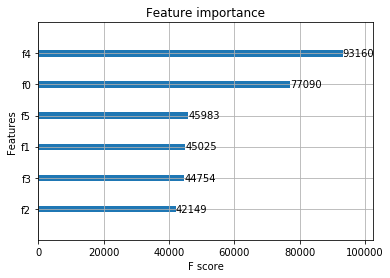

predict finished
total time:  391.3798522949219


In [3]:
## Result of the model...
result2 = project_part2.disambiguate_mentions(train_mentions2, train_labels2, dev_mentions2, men_docs2, parsed_entity_pages2)

In [4]:
## We will be using the following function to compute the accuracy...
def compute_accuracy(result, data_labels):
    assert set(list(result.keys())) - set(list(data_labels.keys())) == set()
    TP = 0.0
    for id_ in result.keys():
        if result[id_] == data_labels[id_]['label']:
            TP +=1
    assert len(result) == len(data_labels)
    return TP/len(result)

In [5]:
### Read the Dev Labels... (For Final Evaluation, we will replace it with the Test Data)
dev_label_file2 = './Dev_set_2/dev2_labels.pickle'
dev_labels2 = pickle.load(open(dev_label_file2, 'rb'))
#for i in range(1,40):
 #   print(f'{i}: {dev_labels2[i]}')

accuracy2 = compute_accuracy(result2, dev_labels2)
print("Accuracy2 = ", accuracy2)

Accuracy2 =  0.7391304347826086


In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')

d = men_docs2['1_GOLF']

In [38]:
offset = 1
length = 8
s_idx = 0
e_idx = 0
#find the start index
for i in range(offset,0, -1):
    if d[i] == '\n':
        s_idx = i
        break
for j in range(offset+length, len(d)):
    if d[j] == '\n':
        e_idx = j
        break
print(s_idx, e_idx)
print(d[s_idx: e_idx])

0 60
GOLF - HENKE TAKES LEAD IN MILWAUKEE, WOODS MAKES PRO DEBUT.


In [40]:
s = {2:{(1,2): ('good','bye')}}
i = 3
if i in s:
    s[i][(2,2)] = ('cool','co')
else:
    s[i] = {(2,3):('go','go')}
s


{2: {(1, 2): ('good', 'bye')}, 3: {(2, 3): ('go', 'go')}}